#**CODSOFT TASK-1**
---

##**TITANIC SURVIVAL PREDICTION**


##IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

##LOAD DATA

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##EXPLORATORY DATA ANALYTICS


DISPLAY FIRST FEW ROWS

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

BASIC INFO OF DATA

In [4]:
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


SUMMARY STATISTICS

In [5]:
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


CHECK MISSING VALUES

In [6]:
print("Number of missing values per column:")
print(df.isnull().sum())

Number of missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


VISUALIZE

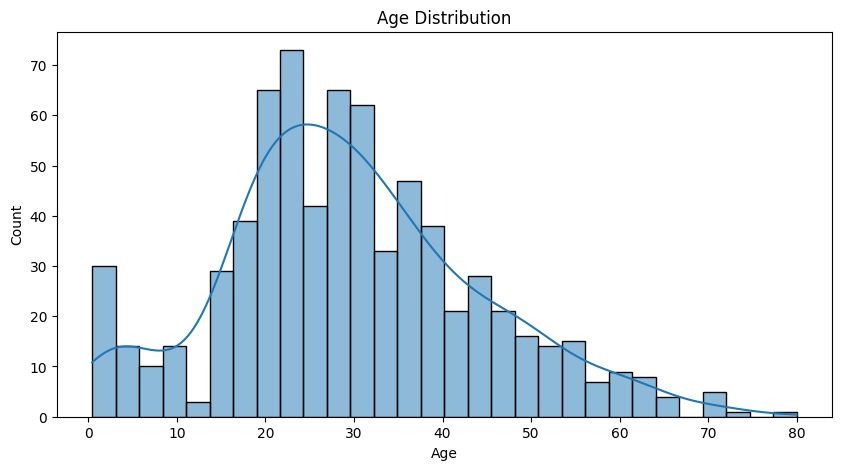

In [7]:
# Distribution of numerical features
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

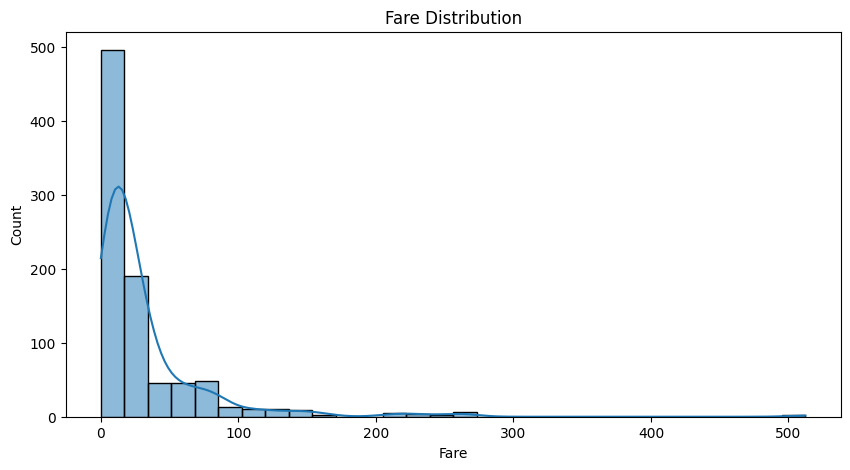

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

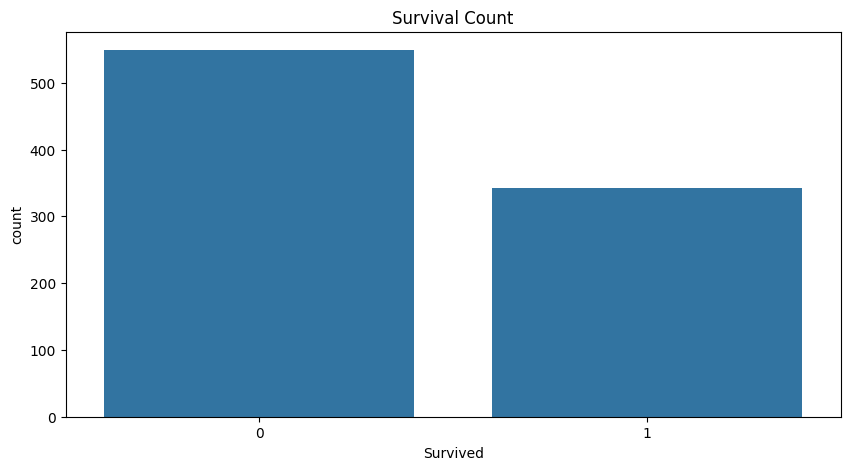

In [9]:
# Count of survivors vs non-survivors
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

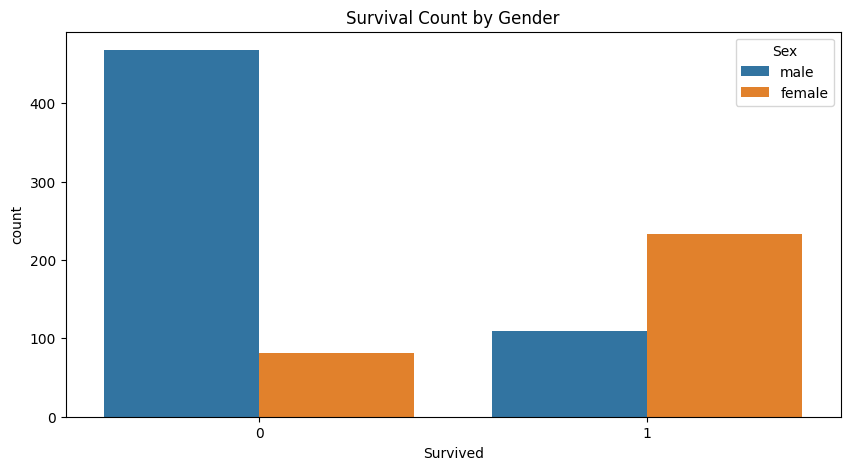

In [10]:
# Survival rate by gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

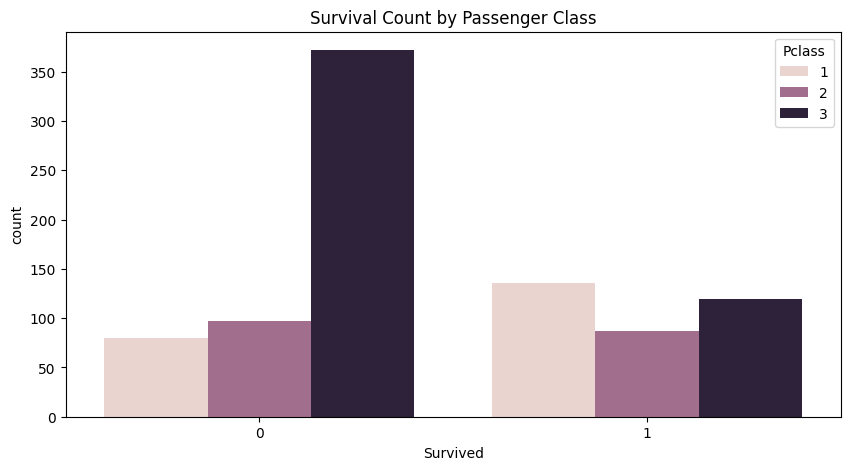

In [11]:
# Survival rate by passenger class
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [12]:
# Display no.of missing values(after visualization)
print("Number of missing values per column (after visualization):")
print(df.isnull().sum())

Number of missing values per column (after visualization):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


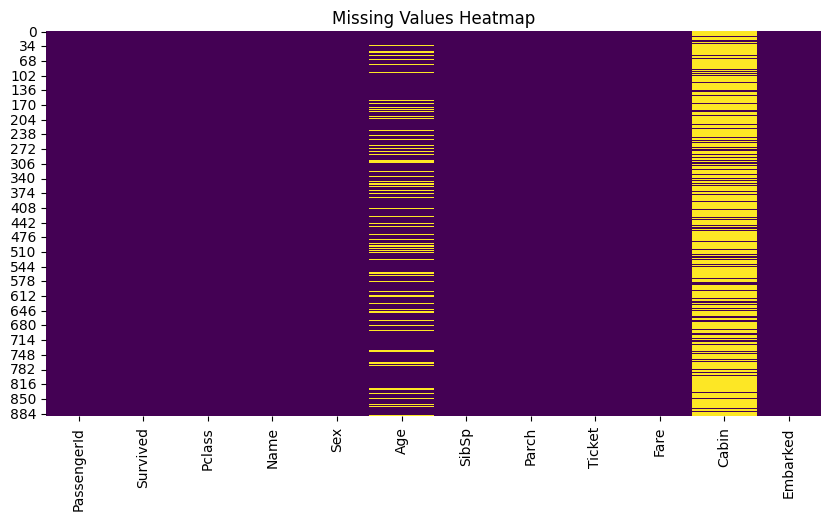

In [13]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

##DATA PREPROCESSING

HANDLE MISSING VALUES

In [14]:
# Fill missing Age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Verify no missing values remain
print("Number of missing values per column (after handling):")
print(df.isnull().sum())

Number of missing values per column (after handling):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


ENCODE CATEGORICAL VARIABLES

In [15]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [16]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Check for any remaining missing values in the split data
print("Number of missing values in training and testing sets:")
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Number of missing values in training and testing sets:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


##BUILDING AND TRAINING MODEL

MACHINE LEARNING MODELS

In [19]:
# K-Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

##EVALUATING MODEL

In [22]:
# K-Nearest Neighbour
knn_train_predictions = knn.predict(X_train)
knn_test_predictions = knn.predict(X_test)
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

print("\nK-Nearest Neighbour Training Accuracy Score:", knn_train_accuracy)
print("K-Nearest Neighbour Testing Accuracy Score:", knn_test_accuracy)


K-Nearest Neighbour Training Accuracy Score: 0.7935393258426966
K-Nearest Neighbour Testing Accuracy Score: 0.7039106145251397


In [23]:
# Decision Tree
tree_train_predictions = tree.predict(X_train)
tree_test_predictions = tree.predict(X_test)
tree_train_accuracy = accuracy_score(y_train, tree_train_predictions)
tree_test_accuracy = accuracy_score(y_test, tree_test_predictions)

print("\nDecision Tree Training Accuracy Score:", tree_train_accuracy)
print("Decision Tree Testing Accuracy Score:", tree_test_accuracy)


Decision Tree Training Accuracy Score: 0.9789325842696629
Decision Tree Testing Accuracy Score: 0.7932960893854749


In [24]:
# Support Vector Machine
svm_train_predictions = svm.predict(X_train)
svm_test_predictions = svm.predict(X_test)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)

print("\nSupport Vector Machine Training Accuracy Score:", svm_train_accuracy)
print("Support Vector Machine Testing Accuracy Score:", svm_test_accuracy)


Support Vector Machine Training Accuracy Score: 0.6699438202247191
Support Vector Machine Testing Accuracy Score: 0.659217877094972
